# **AI & ML Contractor Jobs Research**
## **Purpose:**
### - To Conduct Analysis On The Availability Of Contract Jobs In AI & ML using a LinkedIn Dataset
### - To Conduct Analysis On The Difference Between Entry-Level, Mid-Level, and Senior Level Opportunities between Contract and Full-Time
### - To Create A Prediction Model On The Growth of Contractor Jobs 
## **Through This I hope To Help And Encourage The Undocumented Community To Find Contracting Positions In Tech**

# -----------------------------------------------------------------------------------------

### **The Availability of Contract Jobs in AI & ML:**

### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

### Importing the Data

In [7]:
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

### Function to Create scrollable table in a small window
#### * I excluded the Description column from the data and will exclude it from here on out 

In [12]:
def display_scrollable_dataframe(df, max_rows=10, max_height=300):
    # Exclude the 'description' column
    display_df = df.drop(columns=['description']).head(max_rows)
    
    # Create the HTML table
    html = display_df.to_html()
    
    # Style the HTML table to be scrollable
    html = f"""
    <div style="max-height: {max_height}px; overflow-y: scroll;">
        {html}
    </div>
    """
    
    # Display the styled HTML table
    display(HTML(html))

# Load the CSV file
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

# Display the scrollable dataframe excluding the 'description' column
display_scrollable_dataframe(file_data, max_rows=10, max_height=300)

,title,location,publishedAt,companyName,applicationsCount,contractType,experienceLevel,workType,sector
0,AI/ML Engineer,"New York, NY",2024-05-29,Wesper,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing
1,Software Engineer - AI/ML Systems,"Redwood City, CA",NaN,Snorkel AI,51 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
2,ML Engineer at 100% Remote,"San Jose, CA",2024-06-01,ELITE MENTE LLC,Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting
3,Machine Learning Engineer (L4) - Infrastructure Algorithms and ML,"Los Gatos, CA",2024-05-19,Netflix,Over 200 applicants,Full-time,Not Applicable,Engineering and Information Technology,"Entertainment Providers, Technology, Information and Internet, and Movies, Videos, and Sound"
4,Data Scientist / ML Engineer,"Redwood City, CA",NaN,"Paradyme, Inc.",110 applicants,Full-time,Entry level,Engineering and Information Technology,IT Services and IT Consulting
5,ML Engineer-AI/ML,"Austin, TX",2024-04-30,Zortech Solutions,67 applicants,Full-time,Entry level,Engineering and Information Technology,Human Resources Services
6,Junior Machine Learning Engineer,"Boulder, CO",NaN,HireMeFast LLC,26 applicants,Full-time,Entry level,Information Technology,Software Development
7,ML/ Machine Learning/ Data Scientist/ AI/ Artificial Intelligence Engineer,"Richardson, TX",2024-05-20,HatchPros,145 applicants,Contract,Mid-Senior level,Engineering and Information Technology,IT Services and IT Consulting
8,Research Analyst/ Jr. ML Engineer/ Jr. AI Engineer/ NLP Engineer,"Irving, TX",2024-05-14,Ascendion,Over 200 applicants,Full-time,Entry level,"Research, Analyst, and Information Technology","Technology, Information and Internet"
9,ML/AI Engineer - Optimization,"Houston, TX",2024-05-15,Cognitive Space,85 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing


### Summary Statistics for Categorical Features
#### * Easy way to that the top category for jobs is Full Time 

In [21]:
def display_categorical_summary_statistics(df, max_height=300):
    # Exclude the 'description' column
    df = df.drop(columns=['description'], errors='ignore')
    
    # Select categorical features
    categorical_features = df.select_dtypes(include=[object])
    
    # Check if there are any categorical features
    if categorical_features.empty:
        display(HTML("<h3>No categorical features available to display summary statistics.</h3>"))
        return
    
    # Compute summary statistics for categorical features
    summary_stats = categorical_features.describe().T
    
    # Create the HTML table
    html = summary_stats.to_html()
    
    # Style the HTML table to be scrollable
    html = f"""
    <div>
        <h3>Summary Statistics for Categorical Features</h3>
        <div style="max-height: {max_height}px; overflow-y: scroll;">
            {html}
        </div>
    </div>
    """
    
    # Display the styled HTML table
    display(HTML(html))

# Load the CSV file
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

# Display summary statistics for categorical values
display_categorical_summary_statistics(file_data, max_height=300)

,count,unique,top,freq
title,862,450,Machine Learning Engineer,146
location,862,164,United States,140
publishedAt,850,142,2024-05-22,136
companyName,861,519,"Unreal Staffing, Inc",45
applicationsCount,862,145,Over 200 applicants,371
contractType,862,5,Full-time,744
experienceLevel,862,7,Mid-Senior level,403
workType,862,55,Engineering and Information Technology,557
sector,859,156,Software Development,197


### Null Values 
#### PublishedAt has a lot of null values, but neccesary for our linear regression model

In [24]:
def create_scrollable_table(df, table_id, title, max_height=300):
    # Create the HTML table
    html = df.to_html()
    
    # Style the HTML table to be scrollable
    html = f"""
    <div>
        <h3>{title}</h3>
        <div id="{table_id}" style="max-height: {max_height}px; overflow-y: scroll;">
            {html}
        </div>
    </div>
    """
    return html

# Load the CSV file
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

# Exclude the 'description' column
file_data = file_data.drop(columns=['description'], errors='ignore')

# Null values in the dataset
null_values = file_data.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (file_data.isnull().sum() / len(file_data)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

# Display the tables
display(HTML(html_null_values + html_missing_percentage))

,0
title,0
location,0
publishedAt,12
companyName,1
applicationsCount,0
contractType,0
experienceLevel,0
workType,0
sector,3
,0


### Graphing the number of Full Time vs Contract Jobs

In [52]:
def plot_contract_vs_fulltime_jobs(df):
    # Exclude the 'description' column
    df = df.drop(columns=['description'], errors='ignore')
    
    # Count the number of contract vs full-time jobs
    job_counts = df['contractType'].value_counts().reset_index()
    job_counts.columns = ['Contract Type', 'Count']
    
    # Calculate the percentage of each contract type
    job_counts['Percentage'] = (job_counts['Count'] / job_counts['Count'].sum()) * 100
    
    # Create a bar graph with purple and black color scheme
    fig = px.bar(job_counts, x='Contract Type', y='Count', title='Contract vs Full-time Jobs',
                 labels={'Count': 'Number of Jobs'}, color_discrete_sequence=['purple'],
                 text=job_counts.apply(lambda row: f"{row['Count']} ({row['Percentage']:.2f}%)", axis=1))
    
    # Update layout for better appearance
    fig.update_layout(
        title_font=dict(size=24, color='white'),
        xaxis_title_font=dict(size=18, color='white'),
        yaxis_title_font=dict(size=18, color='white'),
        font=dict(size=14, color='white'),
        plot_bgcolor='black',
        paper_bgcolor='black',
        xaxis=dict(tickfont=dict(color='white')),
        yaxis=dict(tickfont=dict(color='white'))
    )
    
    # Show the plot
    fig.show()

# Load the CSV file
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

# Plot the graph
plot_contract_vs_fulltime_jobs(file_data)

## The Difference of Experience Level between Contract and Full-Time

### The Breakdown of Entry-Level, Mid-Level and Senior-Level in Contractor Jobs

#### Table:

In [53]:
def display_experience_level_breakdown(df):
    # Exclude the 'description' column
    df = df.drop(columns=['description'], errors='ignore')
    
    # Filter for contract positions
    contract_positions = df[df['contractType'] == 'Contract']
    
    # Get the breakdown of experience levels for contract positions
    experience_breakdown = contract_positions['experienceLevel'].value_counts().reset_index()
    experience_breakdown.columns = ['Experience Level', 'Count']
    
    # Calculate the percentage of each experience level
    experience_breakdown['Percentage'] = (experience_breakdown['Count'] / experience_breakdown['Count'].sum()) * 100
    
    # Create the HTML table
    html = experience_breakdown.to_html(index=False)
    
    # Style the HTML table to be scrollable
    html = f"""
    <div>
        <h3>Breakdown of Experience Levels for Contract Positions</h3>
        <div style="max-height: 300px; overflow-y: scroll;">
            {html}
        </div>
    </div>
    """
    
    # Display the styled HTML table
    display(HTML(html))

# Load the CSV file
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

# Display the experience level breakdown for contract positions
display_experience_level_breakdown(file_data)

Experience Level,Count,Percentage
Mid-Senior level,63,61.764706
Entry level,33,32.352941
Associate,5,4.901961
Executive,1,0.980392


#### Graph: 

In [54]:
def plot_experience_level_breakdown(df):
    # Exclude the 'description' column
    df = df.drop(columns=['description'], errors='ignore')
    
    # Filter for contract positions
    contract_positions = df[df['contractType'] == 'Contract']
    
    # Get the breakdown of experience levels for contract positions
    experience_breakdown = contract_positions['experienceLevel'].value_counts().reset_index()
    experience_breakdown.columns = ['Experience Level', 'Count']
    
    # Calculate the percentage of each experience level
    experience_breakdown['Percentage'] = (experience_breakdown['Count'] / experience_breakdown['Count'].sum()) * 100
    
    # Create a bar graph with purple and black color scheme
    fig = px.bar(experience_breakdown, x='Experience Level', y='Count', title='Experience Level Breakdown for Contract Positions',
                 labels={'Count': 'Number of Jobs'}, color_discrete_sequence=['purple'],
                 text=experience_breakdown.apply(lambda row: f"{row['Count']} ({row['Percentage']:.2f}%)", axis=1))
    
    # Update layout for better appearance
    fig.update_layout(
        title_font=dict(size=24, color='white'),
        xaxis_title_font=dict(size=18, color='white'),
        yaxis_title_font=dict(size=18, color='white'),
        font=dict(size=14, color='white'),
        plot_bgcolor='black',
        paper_bgcolor='black',
        xaxis=dict(tickfont=dict(color='white')),
        yaxis=dict(tickfont=dict(color='white'))
    )
    
    # Show the plot
    fig.show()

# Load the CSV file
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

# Plot the graph
plot_experience_level_breakdown(file_data)

### The Breakdown of Entry-Level, Mid-Level and Senior-Level in Full Time Jobs

#### Table: 

In [55]:
def display_experience_level_breakdown_fulltime(df):
    # Exclude the 'description' column
    df = df.drop(columns=['description'], errors='ignore')
    
    # Filter for full-time positions
    fulltime_positions = df[df['contractType'] == 'Full-time']
    
    # Get the breakdown of experience levels for full-time positions
    experience_breakdown = fulltime_positions['experienceLevel'].value_counts().reset_index()
    experience_breakdown.columns = ['Experience Level', 'Count']
    
    # Calculate the percentage of each experience level
    experience_breakdown['Percentage'] = (experience_breakdown['Count'] / experience_breakdown['Count'].sum()) * 100
    
    # Create the HTML table
    html = experience_breakdown.to_html(index=False)
    
    # Style the HTML table to be scrollable
    html = f"""
    <div>
        <h3>Breakdown of Experience Levels for Full-time Positions</h3>
        <div style="max-height: 300px; overflow-y: scroll;">
            {html}
        </div>
    </div>
    """
    
    # Display the styled HTML table
    display(HTML(html))

# Load the CSV file
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

# Display the experience level breakdown for full-time positions
display_experience_level_breakdown_fulltime(file_data)

Experience Level,Count,Percentage
Mid-Senior level,339,45.564516
Entry level,299,40.188172
Not Applicable,69,9.274194
Associate,27,3.629032
Director,7,0.940860
Internship,3,0.403226


#### Graph: 

In [56]:
def plot_experience_level_breakdown_fulltime(df):
    # Exclude the 'description' column
    df = df.drop(columns=['description'], errors='ignore')
    
    # Filter for full-time positions
    fulltime_positions = df[df['contractType'] == 'Full-time']
    
    # Get the breakdown of experience levels for full-time positions
    experience_breakdown = fulltime_positions['experienceLevel'].value_counts().reset_index()
    experience_breakdown.columns = ['Experience Level', 'Count']
    
    # Calculate the percentage of each experience level
    experience_breakdown['Percentage'] = (experience_breakdown['Count'] / experience_breakdown['Count'].sum()) * 100
    
    # Create a bar graph with purple and black color scheme
    fig = px.bar(experience_breakdown, x='Experience Level', y='Count', title='Experience Level Breakdown for Full-time Positions',
                 labels={'Count': 'Number of Jobs'}, color_discrete_sequence=['purple'],
                 text=experience_breakdown.apply(lambda row: f"{row['Count']} ({row['Percentage']:.2f}%)", axis=1))
    
    # Update layout for better appearance
    fig.update_layout(
        title_font=dict(size=24, color='white'),
        xaxis_title_font=dict(size=18, color='white'),
        yaxis_title_font=dict(size=18, color='white'),
        font=dict(size=14, color='white'),
        plot_bgcolor='black',
        paper_bgcolor='black',
        xaxis=dict(tickfont=dict(color='white')),
        yaxis=dict(tickfont=dict(color='white'))
    )
    
    # Show the plot
    fig.show()

# Load the CSV file
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

# Plot the graph
plot_experience_level_breakdown_fulltime(file_data)

### Comparison

In [57]:
def plot_experience_level_comparison(df):
    # Exclude the 'description' column
    df = df.drop(columns=['description'], errors='ignore')
    
    # Filter for contract and full-time positions
    contract_positions = df[df['contractType'] == 'Contract']
    fulltime_positions = df[df['contractType'] == 'Full-time']
    
    # Exclude non-applicable experience levels
    contract_positions = contract_positions[contract_positions['experienceLevel'] != 'Not Applicable']
    fulltime_positions = fulltime_positions[fulltime_positions['experienceLevel'] != 'Not Applicable']
    
    # Get the breakdown of experience levels for contract positions
    contract_breakdown = contract_positions['experienceLevel'].value_counts(normalize=True).reset_index()
    contract_breakdown.columns = ['Experience Level', 'Contract Percentage']
    
    # Get the breakdown of experience levels for full-time positions
    fulltime_breakdown = fulltime_positions['experienceLevel'].value_counts(normalize=True).reset_index()
    fulltime_breakdown.columns = ['Experience Level', 'Full-time Percentage']
    
    # Merge the breakdowns into a single dataframe
    experience_comparison = pd.merge(contract_breakdown, fulltime_breakdown, on='Experience Level', how='outer').fillna(0)
    
    # Melt the dataframe for easier plotting
    experience_comparison_melted = experience_comparison.melt(id_vars=['Experience Level'], 
                                                              value_vars=['Contract Percentage', 'Full-time Percentage'],
                                                              var_name='Job Type', value_name='Percentage')
    
    # Create a bar graph with purple and black color scheme
    fig = px.bar(experience_comparison_melted, x='Experience Level', y='Percentage', color='Job Type', barmode='group',
                 title='Experience Level Breakdown: Contract vs Full-time Positions',
                 labels={'Percentage': 'Percentage of Jobs'},
                 color_discrete_map={'Contract Percentage': 'purple', 'Full-time Percentage': 'lightblue'},
                 text=experience_comparison_melted.apply(lambda row: f"{row['Percentage']:.2%}", axis=1))
    
    # Update layout for better appearance
    fig.update_layout(
        title_font=dict(size=24, color='white'),
        xaxis_title_font=dict(size=18, color='white'),
        yaxis_title_font=dict(size=18, color='white'),
        font=dict(size=14, color='white'),
        plot_bgcolor='black',
        paper_bgcolor='black',
        xaxis=dict(tickfont=dict(color='white')),
        yaxis=dict(tickfont=dict(color='white')),
        legend_title_font=dict(size=16, color='white'),
        legend_font=dict(size=14, color='white')
    )
    
    # Ensure the text annotations are visible
    fig.update_traces(textposition='outside')
    
    # Show the plot
    fig.show()

# Load the CSV file
file_data = pd.read_csv("ai_ml_jobs_linkedin.csv")

# Plot the comparative graph
plot_experience_level_comparison(file_data)

## Creating a Linear Regression Prediction Model

### Import relevant packages

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Prep the data

In [61]:
def prepare_data(file_path):
    # Load the CSV file
    file_data = pd.read_csv(file_path)

    # Exclude the 'description' column and rows with NaN values in 'publishedAt'
    file_data = file_data.drop(columns=['description'], errors='ignore')
    file_data = file_data.dropna(subset=['publishedAt'])

    # Convert 'publishedAt' to datetime
    file_data['publishedAt'] = pd.to_datetime(file_data['publishedAt'])

    # Extract year and month for the time series
    file_data['year_month'] = file_data['publishedAt'].dt.to_period('M')

    # Count the number of contract and full-time jobs per month
    job_counts = file_data.groupby(['year_month', 'contractType']).size().unstack(fill_value=0)

    # Exclude data points where the number of contract jobs is 0
    job_counts = job_counts[job_counts['Contract'] > 0]

    # Reset index to prepare for modeling
    job_counts = job_counts.reset_index()
    job_counts['year_month'] = job_counts['year_month'].astype(str)
    job_counts['year_month'] = pd.to_datetime(job_counts['year_month'])

    return job_counts

### Train the Data

In [63]:
def train_and_predict(job_counts):
    # Use datetime objects directly for modeling
    X = job_counts[['year_month']]
    y_contract = job_counts['Contract']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_contract, test_size=0.2, random_state=42)

    # Convert dates to ordinal for linear regression
    X_train_ordinal = X_train['year_month'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    X_test_ordinal = X_test['year_month'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train_ordinal, y_train)

    # Make predictions
    y_pred = model.predict(X_test_ordinal)

    return X_test, y_test, y_pred, model

### Plot Predictions

In [64]:
def plot_predictions(job_counts, X_test, y_test, y_pred, model):
    plt.figure(figsize=(10, 6))

    # Plot the actual contract jobs
    plt.plot(job_counts['year_month'], job_counts['Contract'], label='Actual')

    # Plot the predicted contract jobs
    plt.scatter(X_test['year_month'], y_pred, color='red', label='Predicted')

    # Plot the regression line
    X_all = job_counts[['year_month']].sort_values(by='year_month')
    X_all_ordinal = X_all['year_month'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    y_all_pred = model.predict(X_all_ordinal)
    plt.plot(X_all['year_month'], y_all_pred, color='green', linestyle='--', label='Regression Line')

    plt.title('Contract Jobs Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Contract Jobs')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Graph

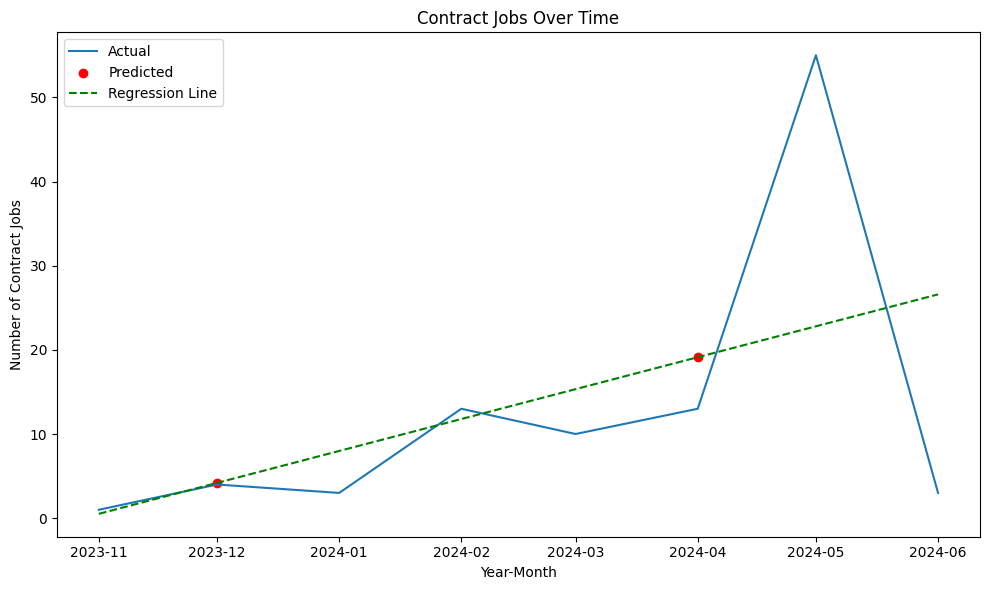

In [65]:
# Prepare data
file_path = "ai_ml_jobs_linkedin.csv"
job_counts = prepare_data(file_path)

# Train and predict
X_test, y_test, y_pred, model = train_and_predict(job_counts)

# Plot predictions
plot_predictions(job_counts, X_test, y_test, y_pred, model)